Берём наиболее актуальные данные полученные парсингом

In [49]:
from os import listdir
from datetime import datetime

temperatures_dir = '../data/temperatures'
measurement_dates = listdir(temperatures_dir)
date_format = '%d.%m.%Y %H:%M:%S'
actual_measurement_date = sorted(datetime.strptime(measurement_date, date_format) for measurement_date in measurement_dates)[-1]
actual_measurement_dir = f'{temperatures_dir}/{actual_measurement_date.strftime(date_format)}'
actual_measurement_dir

'../data/temperatures/01.12.2021 20:56:33'

Читаем данные всех аудиторий

In [60]:
from pandas import read_csv
from os.path import splitext

temperatures = [read_csv(f'{actual_measurement_dir}/{filename}', header=None, index_col=0, parse_dates=True, squeeze=True, names=[splitext(filename)[0]]) for filename in listdir(actual_measurement_dir)]
temperatures

[2020-02-28 12:14:44    23.87
 2020-02-28 12:21:29    23.75
 2020-02-28 12:27:49    23.75
 2020-02-28 12:35:03    23.69
 2020-02-28 12:45:22    23.69
                        ...  
 2021-12-01 20:14:18    19.62
 2021-12-01 20:24:37    19.69
 2021-12-01 20:34:57    19.62
 2021-12-01 20:45:16    19.62
 2021-12-01 20:55:35    19.62
 Name: 316wall, Length: 84164, dtype: float64,
 2020-02-25 11:17:08    41.19
 2020-02-25 11:27:28    41.37
 2020-02-25 11:38:39    42.81
 2020-02-25 11:41:58    42.81
 2020-02-25 11:52:18    42.75
                        ...  
 2021-12-01 20:11:36    23.50
 2021-12-01 20:21:55    23.50
 2021-12-01 20:32:15    23.50
 2021-12-01 20:42:34    23.50
 2021-12-01 20:52:53    23.44
 Name: 412-abat, Length: 80868, dtype: float64,
 2020-02-29 16:09:47    20.25
 2020-02-29 16:19:58    20.56
 2020-02-29 16:30:09    21.37
 2020-02-29 16:40:20    21.62
 2020-02-29 16:50:31    21.75
                        ...  
 2021-12-01 20:07:51    24.25
 2021-12-01 20:18:02    24.19
 2021

Ресэмплим данные, так как датчики не синхронизированы. И собираем в DataFrame для удобной работы

In [94]:
from pandas import to_numeric, DataFrame

merged_temperatures = DataFrame([measurements.apply(to_numeric, errors='coerce', downcast='float').resample('10T').mean() for measurements in temperatures]).T
merged_temperatures

,316wall,412-abat,210wall,412-awall,420bat,420wall,316bat,210bat
2020-02-19 21:30:00,NaN,NaN,NaN,NaN,12.580000,NaN,NaN,NaN
2020-02-19 21:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 21:50:00,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN
2020-02-19 22:00:00,NaN,NaN,NaN,NaN,40.731481,NaN,NaN,NaN
2020-02-19 22:10:00,NaN,NaN,NaN,NaN,51.561000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-01 20:10:00,19.62,23.50,24.19,21.44,51.370000,23.19,44.25,42.44
2021-12-01 20:20:00,19.69,23.50,24.25,21.50,49.690000,23.12,42.06,43.19
2021-12-01 20:30:00,19.62,23.50,24.31,21.50,53.500000,23.12,43.94,42.50
2021-12-01 20:40:00,19.62,23.50,24.25,21.50,49.690000,23.06,42.56,43.13


Сохраним для потомков

In [96]:
merged_temperatures.to_csv(f'{actual_measurement_dir}/merged.csv')

<AxesSubplot:>

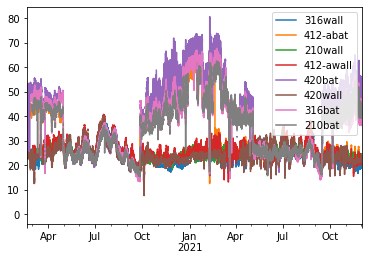

In [99]:
merged_temperatures.plot()

<AxesSubplot:>

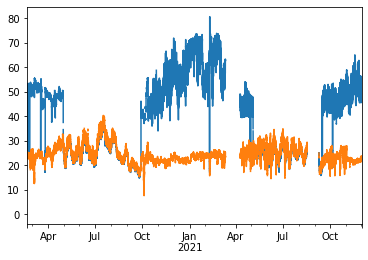

In [101]:
merged_temperatures['420bat'].plot()
merged_temperatures['420wall'].plot()

In [103]:
temperatures_changes = merged_temperatures.pct_change()
temperatures_changes

,316wall,412-abat,210wall,412-awall,420bat,420wall,316bat,210bat
2020-02-19 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 21:40:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2020-02-19 21:50:00,NaN,NaN,NaN,NaN,0.987281,NaN,NaN,NaN
2020-02-19 22:00:00,NaN,NaN,NaN,NaN,0.629259,NaN,NaN,NaN
2020-02-19 22:10:00,NaN,NaN,NaN,NaN,0.265876,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-01 20:10:00,-0.009591,-0.002547,-0.002474,0.000000,-0.003685,0.000000,0.072727,-0.013023
2021-12-01 20:20:00,0.003568,0.000000,0.002480,0.002799,-0.032704,-0.003019,-0.049492,0.017672
2021-12-01 20:30:00,-0.003555,0.000000,0.002474,0.000000,0.076675,0.000000,0.044698,-0.015976
2021-12-01 20:40:00,0.000000,0.000000,-0.002468,0.000000,-0.071215,-0.002595,-0.031406,0.014824


Выбросы синего ряда свидетельствуют о переключении отопления

<AxesSubplot:>

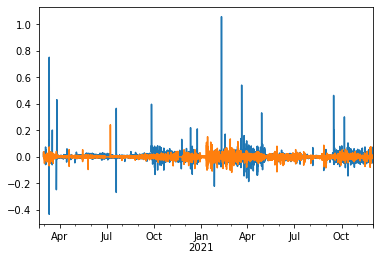

In [108]:
temperatures_changes['210bat'].plot()
temperatures_changes['210wall'].plot()

<AxesSubplot:>

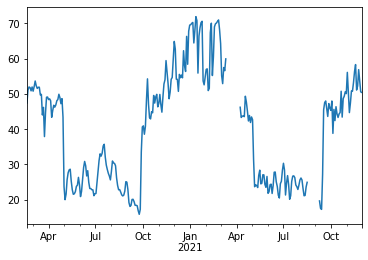

In [110]:
merged_temperatures['412-abat'].resample('2D').mean().plot()

<AxesSubplot:>

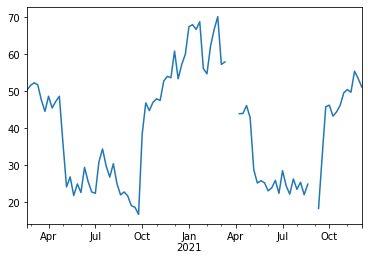

In [111]:
merged_temperatures['412-abat'].resample('1W').mean().plot()

<AxesSubplot:>

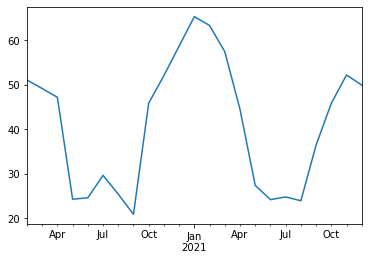

In [112]:
merged_temperatures['412-abat'].resample('1M').mean().plot()

<AxesSubplot:>

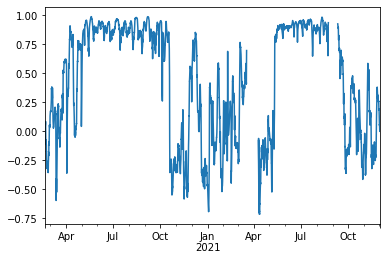

In [152]:
merged_temperatures['420bat'].rolling(1000, min_periods=100).corr(merged_temperatures['420wall']).plot()

<AxesSubplot:>

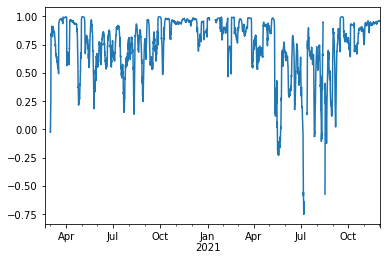

In [153]:
merged_temperatures['316bat'].rolling(1000, min_periods=100).corr(merged_temperatures['210bat']).plot()

Автокорреляционная функция по месяцам

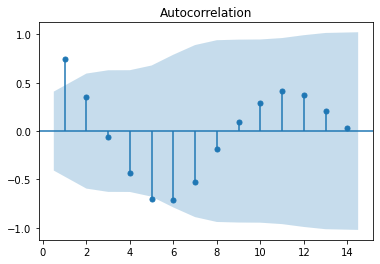

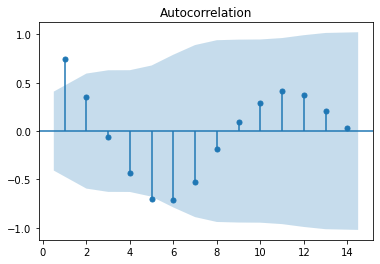

In [183]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_temperatures['420bat'].resample('M').mean(), missing='drop', zero=False)

Автокорреляционная функция по месяцам с использованием Быстрого Преобразования Фурье

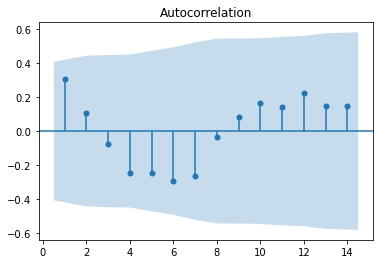

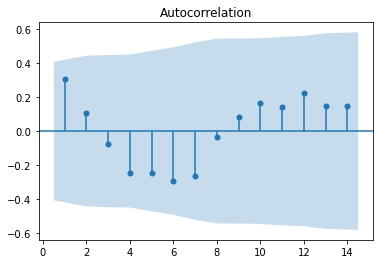

In [184]:
plot_acf(temperatures_changes['420bat'].resample('M').mean(), missing='drop', fft=True, zero=False)

Автокорреляционная функция по месяцам с уменьшение дов. интервала

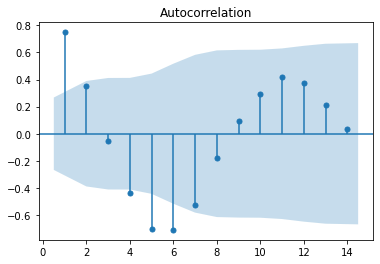

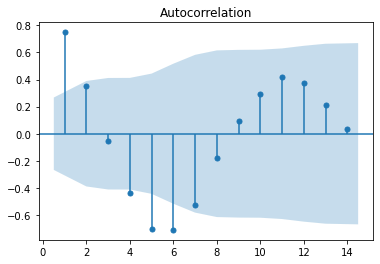

In [185]:
plot_acf(merged_temperatures['420bat'].resample('M').mean(), missing='drop', alpha=0.2, zero=False)

Автокорреляционная функция по месяцам с корреткировкой для автоковариации

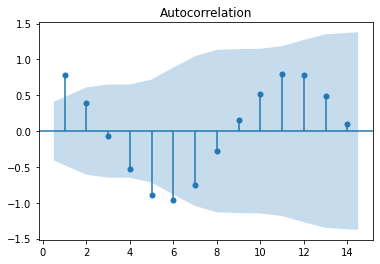

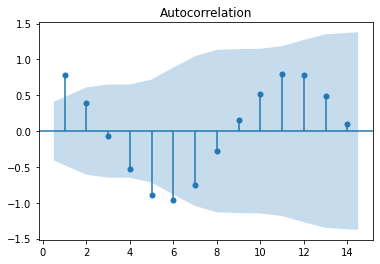

In [186]:
plot_acf(merged_temperatures['420bat'].resample('M').mean(), missing='drop', adjusted=True, zero=False)